# Liquid surface

Detailed here is the reduction of reflectometry from a liquid surface, such that the sample surface is horizontally oriented and the I07 double crystal deflector system is used to position the X-ray beam.
Here, we show the reduction of reflectometry collected from a water-surface in air. 

The first task is to enure that the necessary modules and packages have been imported.

In [11]:
# islatu is the data reduction pacakge
from islatu import io
from scipy.interpolate import splrep
import matplotlib.pyplot as plt

Once everything has been imported, we must set up the DCD q-dependent normalisation, this is due to slight deviations in the DCD crystals that lead to changes in the incident radiation intensity. 
The normalisation curve should have been collected during your beamtime, the `.dat` file that contains this curve should be assigned below.

In [9]:
normalisation_file = 'qdcd_norm.dat'

The file is read using the `islatu.io.i07_dat_parser` function and the data and associated metadata are returned. 

In [10]:
metadata_norm, data_norm = io.i07_dat_parser(normalisation_file)

It is possible to quickly observe the shape of the normalisation, by plotting. 
The x-axis ($q$) data is in the `'qdcd_'` object, while the intensity variation is typically stored in the `'adc2'` object. 

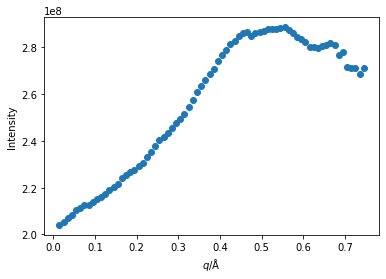

In [15]:
plt.plot(data_norm['qdcd_'], data_norm['adc2'], 'o')
plt.xlabel(r'$q$/Å')
plt.ylabel(r'Intensity')
plt.show()

It can be seen that this information has been collected at a series of linearly-spaced, discrete points.
Therefore, such that the normalisation may be performed at the $q$-points collected in the experimental measurements we must interpolate, which is achieved with the `scipy.interpolate.splrep` function. 

In [16]:
itp = splrep(data_norm['qdcd_'], data_norm['adc2'])

This `itp` object will be used later in the reduction process. 